In [193]:
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import math

1. Смоделировать выборку из 15 независимых наблюдений над случайной величиной X,
имеющей нормальный закон распределения с параметрами (-2,10).

In [194]:
norm_r=sts.norm.rvs(loc=-2,scale=math.sqrt(10), size=15)
print(norm_r)

[ 1.47144378 -5.54065009 -7.07655456 -1.35578303 -4.43922494 -5.34050675
 -1.78889686 -2.52084187 -3.21379138  0.03571824 -0.15827797 -0.42505909
 -5.58781281 -6.41895016 -3.21028306]


1.1. С надежностью 0.95 найти интервальную оценку (доверительный интервал) для
математического ожидания случайной величины X, предполагая, что дисперсия
случайной величины X известна.
*интервальные оценки найти двумя способами.
Первый способ заключается в программной реализации формул для вычисления границ
интервальной оценки, а второй — в использовании метода interval из модуля
статистических функций scipy.stats.

$$P=(Xср- \Delta \le a \le Xср-\Delta)=0.95$$
$$
\Delta=\frac{t_\gamma\sigma}{\sqrt{n}}$$
$$
\Phi(t_\gamma)=\frac{\gamma}{2} $$

In [195]:
x_mean=np.mean(norm_r)
t_y=1.96 
del_=(1.96*np.sqrt(10))/math.sqrt(15)
low_bound=x_mean-del_
up_bound=x_mean+del_
print(f"Доверительный интервал для a способ 1): [{low_bound};{up_bound}]")

interval = sts.norm.interval(0.95, loc=np.mean(norm_r), scale=np.sqrt(10) / np.sqrt(15))
print(f"Доверительный интервал (способ 2): [{interval[0]:.2f}, {interval[1]:.2f}]")

Доверительный интервал для a способ 1): [-4.638298000881485;-1.437631403644799]
Доверительный интервал (способ 2): [-4.64, -1.44]


1.2. С надежностью  найти интервальную оценку (доверительный интервал) для
математического ожидания случайной величины X, предполагая, что дисперсия
случайной величины X неизвестна
$$P=(Xср- \Delta \le a \le Xср-\Delta)=0.95$$
$$
\Delta=\frac{t_\gamma*S}{\sqrt{n}}$$
$$
\Phi(t_\gamma)=\frac{\gamma}{2} $$

In [196]:
x_mean = np.mean(norm_r)

# 2. Вычисляем выборочную дисперсию S^2
S_2 = 0
for i in norm_r:
    S_2 += math.pow(i - x_mean, 2)
S_2 /= 14  


S = math.sqrt(S_2)

t_value = sts.t.ppf(1 - 0.05 / 2, df=15-1)  # квантиль для доверительного уровня 95%
print(t_value)

delta = t_value * S / np.sqrt(15)
lower_bound = x_mean - delta
upper_bound = x_mean + delta
print(f"Доверительный интервал для a при неизвестной дисперсии: [{lower_bound:.2f}; {upper_bound:.2f}]")

# 6. Способ с использованием scipy.stats.t.interval
interval = sts.t.interval(0.95, df=15-1, loc=x_mean, scale=S / np.sqrt(15))
print(f"Доверительный интервал (способ 2): [{interval[0]:.2f}, {interval[1]:.2f}]")

2.1447866879169273
Доверительный интервал для a при неизвестной дисперсии: [-4.50; -1.58]
Доверительный интервал (способ 2): [-4.50, -1.58]


1.3. С надежностью 0.95 найти интервальную оценку (доверительный интервал) для
дисперсии случайной величины X.
$$
\left( \frac{(n - 1) S^2}{\chi^2_{\frac{\alpha}{2}, n-1}}, \frac{(n - 1) S^2}{\chi^2_{1 - \frac{\alpha}{2}, n-1}} \right)
$$

In [197]:
alpha = 0.05
chi2_lower = sts.chi2.ppf(alpha / 2, df=14)
chi2_upper = sts.chi2.ppf(1 - alpha / 2, df=14)

# 3. Вычисляем границы доверительного интервала для дисперсии
lower_bound = 14 * S_2 / chi2_upper
upper_bound = 14 * S_2 / chi2_lower

print(f"Доверительный интервал для дисперсии при надежности 0.95: ({lower_bound:.2f}; {upper_bound:.2f})")

Доверительный интервал для дисперсии при надежности 0.95: (3.73; 17.30)


2. Построить график зависимости длины доверительного интервала от надежности при
неизменном объеме выборки для случаев интервального оценивания математического
ожидания и дисперсии.

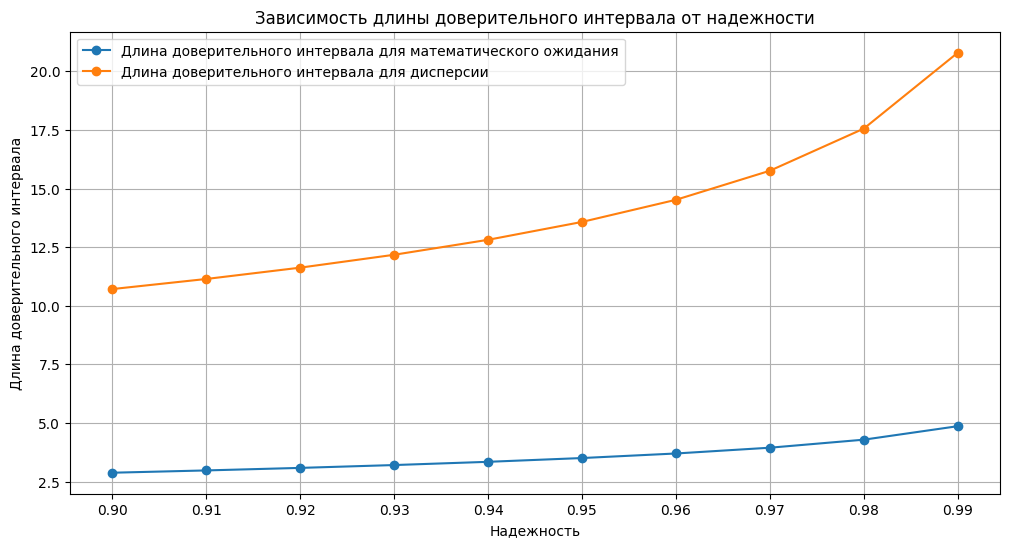

In [198]:
confidence_levels = np.linspace(0.90, 0.99, 10)  # от 90% до 99%

# Длины доверительных интервалов
len_mean = []
len_var = []

for confidence in confidence_levels:
    # 1. Доверительный интервал для математического ожидания
    alpha = 1 - confidence
    t_value = sts.t.ppf(1 - alpha / 2, 14) 
    len_interval = t_value * (np.sqrt(10) / np.sqrt(15)) 
    length_mean = 2 * len_interval 
    len_mean.append( length_mean)

    # 2. Доверительный интервал для дисперсии
    chi2_lower = sts.chi2.ppf(alpha / 2, 14)
    chi2_upper = sts.chi2.ppf(1 - alpha / 2, 14)
    length_variance = (14) * S_2 / chi2_lower - (14) * S_2 / chi2_upper
    len_var.append(length_variance)

# Построение графиков
plt.figure(figsize=(12, 6))
plt.plot(confidence_levels, len_mean, marker='o', label='Длина доверительного интервала для математического ожидания')
plt.plot(confidence_levels, len_var, marker='o', label='Длина доверительного интервала для дисперсии')
plt.title('Зависимость длины доверительного интервала от надежности')
plt.xlabel('Надежность')
plt.ylabel('Длина доверительного интервала')
plt.grid()
plt.legend()
plt.xticks(confidence_levels)
plt.show()

3. Построить график зависимости длины доверительного интервала от объема выборки при
неизменной надежности для случаев интервального оценивания математического
ожидания и дисперсии.
Пусть объем выборки изменяется от 10 до 40 с шагом 5

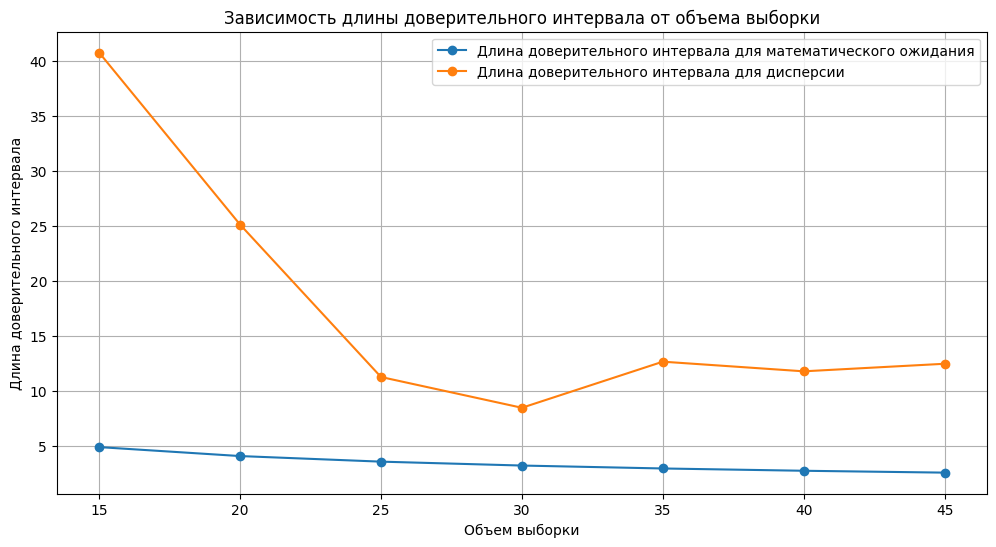

In [199]:
sample_size = list(range(15, 50, 5))
confidence=0.99
# Длины доверительных интервалов
len_mean = []
len_var = []

for size in sample_size:
    norm_r=sts.norm.rvs(loc=-2,scale=math.sqrt(10), size=size)

    x_mean = np.mean(norm_r)

# 2. Вычисляем выборочную дисперсию S^2
    S_2 = 0
    for i in norm_r:
        S_2 += math.pow(i - x_mean, 2)
    S_2 /= size-1
    # 1. Доверительный интервал для математического ожидания
    alpha = 1 - confidence
    t_value = sts.t.ppf(1 - alpha / 2, size-1) 
    len_interval = t_value * (np.sqrt(10) / np.sqrt(size)) 
    length_mean = 2 * len_interval 
    len_mean.append( length_mean)

    # 2. Доверительный интервал для дисперсии
    chi2_lower = sts.chi2.ppf(alpha / 2,  size-1)
    chi2_upper = sts.chi2.ppf(1 - alpha / 2,  size-1)
    length_variance = ( size-1) * S_2 / chi2_lower - ( size-1) * S_2 / chi2_upper
    len_var.append(length_variance)

# Построение графиков
plt.figure(figsize=(12, 6))
plt.plot(sample_size, len_mean, marker='o', label='Длина доверительного интервала для математического ожидания')
plt.plot(sample_size, len_var, marker='o', label='Длина доверительного интервала для дисперсии')
plt.title('Зависимость длины доверительного интервала от объема выборки')
plt.xlabel('Объем выборки')
plt.ylabel('Длина доверительного интервала')
plt.grid()
plt.legend()
plt.xticks(sample_size)
plt.show()

4. Смоделировать 1900 выборок из 15 значений нормально распределенной случайной
величины X с параметрами (-2,10). По каждой из 1900 выборок с надежностью 0,95 найти
интервальную оценку (доверительный интервал) для математического ожидания случайной
величины X, предполагая, что дисперсия случайной величины X неизвестна.

По результатам моделирования найти точечную оценку $\gamma$* надежности $\gamma$.

In [200]:
M=1900
count_gamma=0 # счетчик для гамма, попавших в интервал
for i in range(M):
    sample = sts.norm.rvs(loc=-2, scale=math.sqrt(10), size=15)
    sample_mean = np.mean(sample)
    sample_s_2 = 0
    for i in sample:
        sample_s_2 += math.pow(i - sample_mean, 2)
    sample_s_2 /= 14 
    t_value = sts.t.ppf(1 - alpha / 2, 14)
    margin = t_value * np.sqrt(sample_s_2 / 15)
    
    # Доверительный интервал
    ci_lower = sample_mean - margin
    ci_upper = sample_mean +margin
    
    # Проверяем, содержит ли интервал истинное значение математического ожидания
    if (ci_lower <= -2) and (-2 <= ci_upper):
        count_gamma += 1

# Точечная оценка надежности γ*
gamma = count_gamma / M
print(f"Точечная оценка надежности γ*: {gamma}")
    

Точечная оценка надежности γ*: 0.988421052631579


5. Смоделировать M выборок из n значений нормально распределенной случайной
величины X с параметрами (-2,10).

In [201]:
M = 100 
n = 15 

samples = np.zeros((M, n))

for i in range(M):
    sample = sts.norm.rvs(loc=-2, scale=np.sqrt(10), size=n)
    samples[i] = sample 


5.1. По каждой из M выборок найти наблюдаемое значение случайной величины Z
(описание случайной величины Z приведено в Вашем варианте)

$Z = \frac{\bar{X} - a}{S} \cdot \sqrt{n}$

In [202]:
z_arr=list()
for i in samples:
    x_m=np.mean(i)
    s_2 = 0
    for i in sample:
        s_2 += math.pow(i - x_m, 2)
    s_2 /= 14 
    s=np.sqrt(s_2)
    z=np.sqrt(15)*(x_m+2)/s
    z_arr.append(z)


5.2. По выборке из M значений случайной величины Z найти выборочные числовые
характеристики ее распределения.

In [203]:
z_mean=np.mean(z_arr)
z_var=np.var(z_arr)
z_median = np.median(z_arr)
std= np.std(z_arr) 
skewness = sts.skew(z_arr)        # Коэффициент ассиметрии
kurtosis = sts.kurtosis(z_arr)

# Вывод результатов
print(f'Математическое ожидание: {z_mean:.5f}')
print(f'Медиана: {z_median:.5f}')
print(f'Дисперсия: {z_var:.3f}')
print(f'Стандартное отклонение: {std:.5f}')
print(f'Коэффициент ассиметрии: {skewness:.5f}')
print(f'Эксцесс: {kurtosis:.5f}')

Математическое ожидание: 0.01366
Медиана: 0.04705
Дисперсия: 0.367
Стандартное отклонение: 0.60613
Коэффициент ассиметрии: -0.04409
Эксцесс: -0.29966


5.3. Построить гистограмму относительных частот и теоретическую кривую распределения
случайной величины Z, а также ящичковую диаграмму.

In [204]:
std_z = np.std(z_arr)

# Формула Скотта: ширина бина
h_z = 3.5 * std_z / (110 ** (1/3))

#полученные интервалы
bins = (np.arange(min(z_arr), max(z_arr) + h_z, h_z))/1900
print(bins)

[-6.89887049e-04 -4.56855682e-04 -2.23824316e-04  9.20705079e-06
  2.42238417e-04  4.75269784e-04  7.08301150e-04  9.41332517e-04]


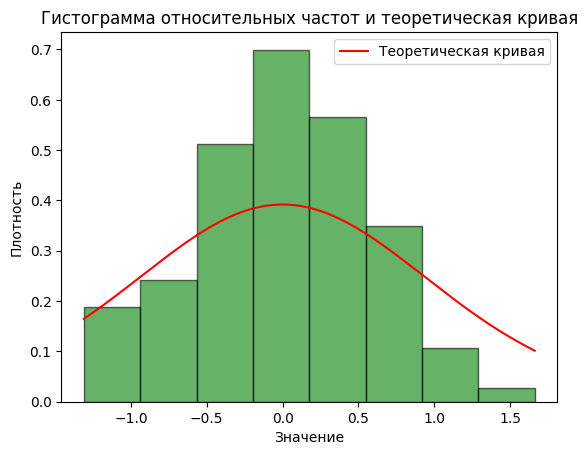

In [208]:
plt.hist(z_arr, bins=len(bins), density=True, alpha=0.6, color='g', edgecolor='black')
plt.title('Гистограмма относительных частот')
plt.xlabel('Значение')
plt.ylabel('Плотность')

# Теоретическая кривая распределения Стьюдента
x = np.linspace(np.min(z_arr), np.max(z_arr), 1900)
pdf = sts.t.pdf(x, 14)
plt.plot(x, pdf, 'r', label="Теоретическая кривая")

# Настройка графика
plt.title('Гистограмма относительных частот и теоретическая кривая')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()

# Показать график
plt.show()

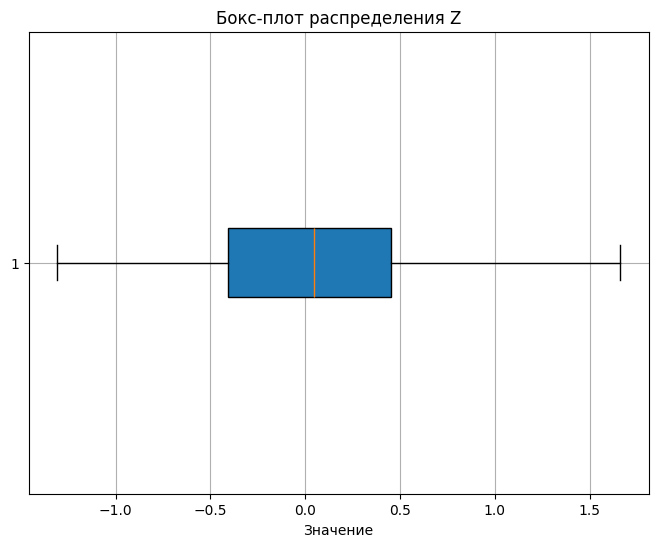

Фактическое количество выбросов: 0


In [211]:
plt.figure(figsize=(8, 6))
plt.boxplot(z_arr, vert=False, patch_artist=True)
plt.title('Бокс-плот распределения Z')
plt.xlabel('Значение')
plt.grid(True)
plt.show()

q1 = np.percentile(z_arr, 25)
q3 = np.percentile(z_arr, 75)
iqr = q3 - q1

# Вычисляем границы для усов
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = []
for i in z_arr:
    if i < lower_bound or i > upper_bound:
        outliers.append(i)
num_outliers = len(outliers)
print(f"Фактическое количество выбросов: {num_outliers}")